# **Bivariate Analysis**

The dataset is already download in .csv format

# **IMPORTING THE PACKAGE**

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Load the dataset**

In [2]:
df=pd.read_csv("/content/loan_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns
numerical_features

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [5]:
categorical_features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

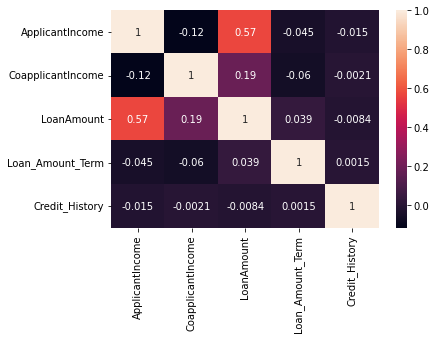

In [6]:
df.corr()
#plotting the correlation
plt.figure(1)
sns.heatmap(df.corr(), annot = True)

# **Perform Visualizations**

<Figure size 864x720 with 0 Axes>

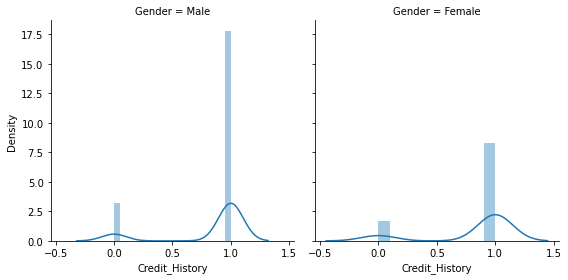

In [7]:
#exploring the Gender columns more
plt.figure(3, figsize=(12, 10))
g = sns.FacetGrid(data = df, col= 'Gender', height = 4)
g.map(sns.distplot, 'Credit_History')

<Figure size 864x720 with 0 Axes>

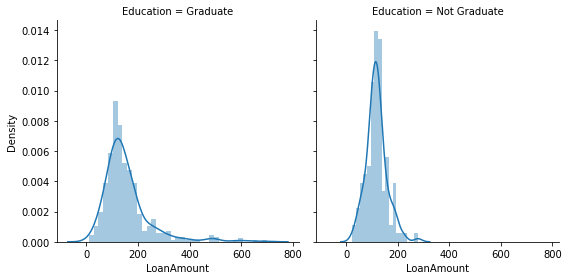

In [8]:
#exploring the Education columns more
plt.figure(3, figsize=(12, 10))
g = sns.FacetGrid(data = df, col= 'Education', height = 4)
g.map(sns.distplot, 'LoanAmount')

<Figure size 864x720 with 0 Axes>

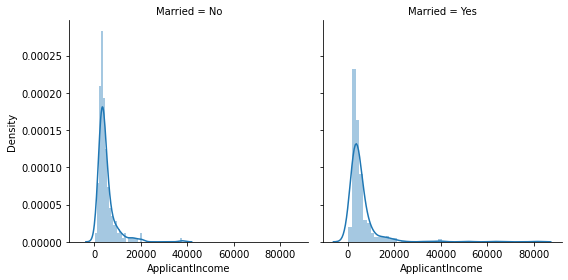

In [9]:
#exploring the Married columns more
plt.figure(3, figsize=(12, 10))
g = sns.FacetGrid(data = df, col= 'Married', height = 4)
g.map(sns.distplot, 'ApplicantIncome')

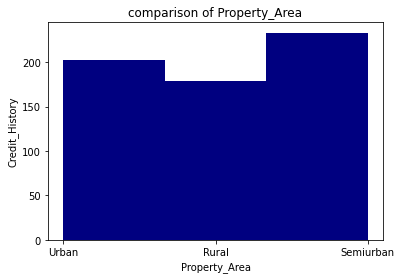

In [10]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = df.Property_Area, bins = 3, color="navy")
plt.title('comparison of Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Credit_History')
plt.show()

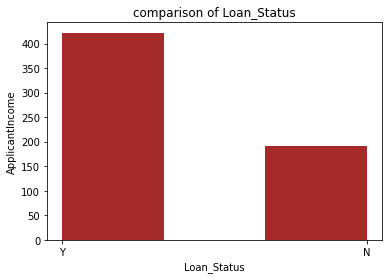

In [11]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = df.Loan_Status, bins = 3, color="brown")
plt.title('comparison of Loan_Status')
plt.xlabel('Loan_Status')
plt.ylabel('ApplicantIncome')
plt.show()

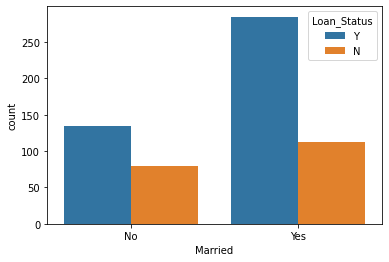

In [12]:
# Now we will find the relationship between Loan_Status 
# As there is no relationship between Married and Loan_Status 
sns.countplot(x="Married", hue="Loan_Status",data=df)

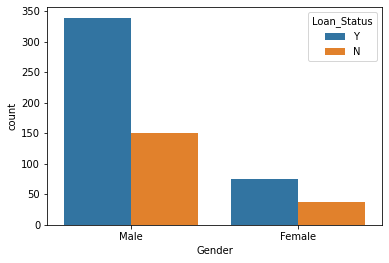

In [13]:
#  Gender v/s Loan status
sns.countplot(x="Gender", hue="Loan_Status", data=df);

#  Most of the males have got there loans approved.

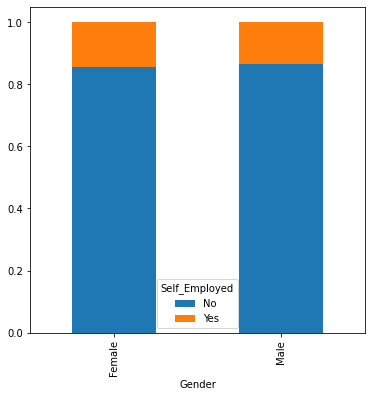

In [14]:
# comparison between Self_Employed and Gender

Gender = pd.crosstab(df['Gender'],df['Self_Employed'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))

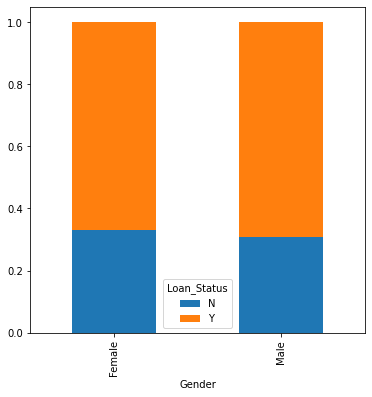

In [15]:
# comparison between Loan_Status and Gender

Gender = pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))

# **calculating total Loan_Amount_Term in gender**

In [16]:
total_0 = df.Loan_Amount_Term[df.Dependents == '0'].sum()
total_1 = df.Loan_Amount_Term[df.Dependents == '1'].sum()
total_2 = df.Loan_Amount_Term[df.Dependents == '2'].sum()
total_3above = df.Loan_Amount_Term[df.Dependents == '3+'].sum()

print("Total Balance in Dependents 0 :",total_0)
print("Total Balance in Dependents 1 :",total_1)
print("Total Balance in Dependents 2 :",total_2)
print("Total Balance in Dependents 3 :",total_3above)

Total Balance in Dependents 0 : 116268.0
Total Balance in Dependents 1 : 33264.0
Total Balance in Dependents 2 : 34428.0
Total Balance in Dependents 3 : 16260.0


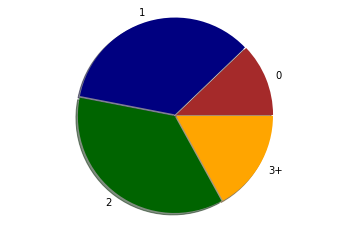

In [17]:
# plotting a pie chart

labels = '0', '1','2' ,'3+'
colors = ['brown', 'navy', 'darkgreen' , 'orange']
sizes =  [116, 332, 344, 162]
explode = [ 0.01, 0.01, 0.01, 0.01]

plt.pie(sizes, colors = colors, labels = labels, explode = explode, shadow = True)

plt.axis('equal')
plt.show()